In [31]:
import pandas as pd 
import requests as rq 
import json as json 
import time as time 
import matplotlib.pyplot as plt
import pytz
from datetime import datetime as dt

In [32]:
spx = pd.read_csv('SPX.csv', delimiter = ',', index_col = 'Date', infer_datetime_format = True, parse_dates = True)

spx = spx.sort_index(ascending = True)

spx = spx[spx.index >= '01/01/2021']

eastern = pytz.timezone('US/Eastern')

spx['Open Time'] = spx.index.tz_localize('UTC').tz_convert(eastern)
spx['Close Time'] = spx.index.tz_localize('UTC').tz_convert(eastern)

spx['Open Time'] = spx['Open Time'].map(lambda x: x.replace(hour = 9))
spx['Open Time'] = spx['Open Time'].map(lambda x: x.replace(minute = 30))
spx['Open Time'] = spx['Open Time'] + pd.DateOffset(1)

spx['Close Time'] = spx['Close Time'].map(lambda x: x.replace(hour = 16))
spx['Close Time'] = spx['Close Time'] + pd.DateOffset(1)



In [33]:
btc = pd.read_csv('bitfinex_BTC_USD_30m.csv', delimiter =',', index_col = 'Date', 
                    infer_datetime_format = True, parse_dates = True)

eastern = pytz.timezone('US/Eastern')

btc.index = btc.index.tz_convert(eastern)




In [34]:
spx_weekly = spx.copy()

spx_weekly = spx_weekly.resample('W-SUN').agg({'Open Time': 'first', 'Close Time': 'last', 
                                               'Open': 'first', 'Close': 'last'}) 

spx_weekly.index = spx_weekly.index - pd.DateOffset(7)

spx_weekly['Returns'] = (spx_weekly['Close'] - spx_weekly['Open']) / spx_weekly['Open'] 

spx_weekly['Next Open Time'] = spx_weekly['Open Time'].shift(-1)
spx_weekly = spx_weekly.dropna() 


spx_weekly['BTC Weekend'] = spx_weekly.apply(lambda x: ((btc.loc[x['Next Open Time']]['Open'] - btc.loc[x['Close Time']]['Close']) / btc.loc[x['Close Time']]['Close']), axis = 1)
#spx_weekly['BTC Week'] = spx_weekly.apply(lambda x: (( btc.loc[x['Close Time']]['Close'] - btc.loc[x['Open Time']]['Open'] ) / btc.loc[x['Open Time']]['Open'] ), axis = 1)
                                               
spx_weekly

,Open Time,Close Time,Open,Close,Returns,Next Open Time,BTC Weekend
Date,,,,,,,
2021-01-03,2021-01-04 09:30:00-05:00,2021-01-08 16:00:00-05:00,3764.61,3824.68,0.015957,2021-01-11 09:30:00-05:00,-0.161591
2021-01-10,2021-01-11 09:30:00-05:00,2021-01-15 16:00:00-05:00,3803.14,3768.25,-0.009174,2021-01-19 09:30:00-05:00,0.039373
2021-01-17,2021-01-19 09:30:00-05:00,2021-01-22 16:00:00-05:00,3781.88,3841.47,0.015757,2021-01-25 09:30:00-05:00,0.031789
2021-01-24,2021-01-25 09:30:00-05:00,2021-01-29 16:00:00-05:00,3851.68,3714.24,-0.035683,2021-02-01 09:30:00-05:00,-0.027546
2021-01-31,2021-02-01 09:30:00-05:00,2021-02-05 16:00:00-05:00,3731.17,3886.83,0.041719,2021-02-08 09:30:00-05:00,0.161090
...,...,...,...,...,...,...,...
2022-03-13,2022-03-14 09:30:00-04:00,2022-03-18 16:00:00-04:00,4202.75,4463.12,0.061952,2022-03-21 09:30:00-04:00,-0.014987
2022-03-20,2022-03-21 09:30:00-04:00,2022-03-25 16:00:00-04:00,4462.40,4543.06,0.018075,2022-03-28 09:30:00-04:00,0.065309
2022-03-27,2022-03-28 09:30:00-04:00,2022-04-01 16:00:00-04:00,4541.09,4545.86,0.001050,2022-04-04 09:30:00-04:00,-0.007184


0.4224930835638643


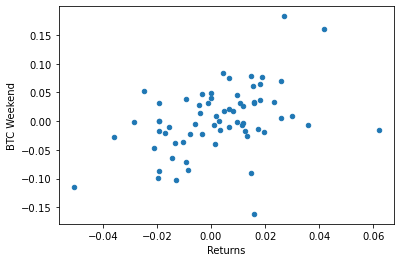

In [36]:
print(spx_weekly['BTC Weekend'].corr(spx_weekly['Returns']))
spx_weekly.plot.scatter('Returns', 'BTC Weekend')
plt.show()